# Consensus Motif # 
Find conserved patterns across multiple time series

Stumpy Tutorial Consenus Motif:
https://stumpy.readthedocs.io/en/latest/Tutorial_Consensus_Motif.html

Matrix Profile XV: ConsensusMotifs:
https://sites.google.com/site/consensusmotifs/

In [9]:
from core import utils

import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle


## Eye-tracking (EOG) Dataset (MP XV) ##

Vertical Eye Position While Writing Different Japanese Sentences

From https://stumpy.readthedocs.io/en/latest/Tutorial_Consensus_Motif.html

https://zenodo.org/record/4288978


In [10]:
# Parameter
Ts = []
for i in [6, 7, 9, 10, 16, 24]:
    Ts.append(pd.read_csv(f'https://zenodo.org/record/4288978/files/EOG_001_01_{i:03d}.csv?download=1').iloc[:, 0].values)

In [11]:
def visualize_consensusmotif(Ts, Ts_idx, subseq_idx, window_range, d):
    # visualize consensus motif snippet
    consensus_motif = Ts[Ts_idx][subseq_idx : subseq_idx + window_range]
    nn_idx = []
    for i, T in enumerate(Ts):
        nn_idx.append(np.argmin(stumpy.core.mass(consensus_motif, T)))
        lw = 1
        label = None
        if i == Ts_idx:
            lw = 4
            label = 'Consensus Motif'
        plt.plot(stumpy.core.z_norm(T[nn_idx[i] : nn_idx[i]+window_range]), lw=lw, label=label)

    plt.title(f'The Consensus Motif (Z-normalized): Dilation = {d}, Range = {window_range}')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.show()

    # plot time series
    fig, ax = plt.subplots(len(Ts), sharex=True, sharey=True)
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, T in enumerate(Ts):
        ax[i].plot(T, color=next(colors)["color"])
        ax[i].set_ylim((-330, 1900))
    plt.subplots_adjust(hspace=0)
    plt.xlabel('Time')

    # visualize consensus motif on top
    ymin, ymax = ax[i].get_ylim()
    for i in range(len(Ts)):
        r = Rectangle((nn_idx[i], ymin), window_range, ymax-ymin, alpha=0.3)
        ax[i].add_patch(r)
    plt.suptitle(f'Dilation = {d}, Range = {window_range}', fontsize=14)
    plt.show()

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `ostinato(['Ts', 'm', 'd']) and function `aamp_ostinato(['Ts', 'm']) have different arguments/parameters.
  warnings.warn(msg)


Dilation=1, w=50: Best Radius 0.87 in ts 4 starting at 1271.


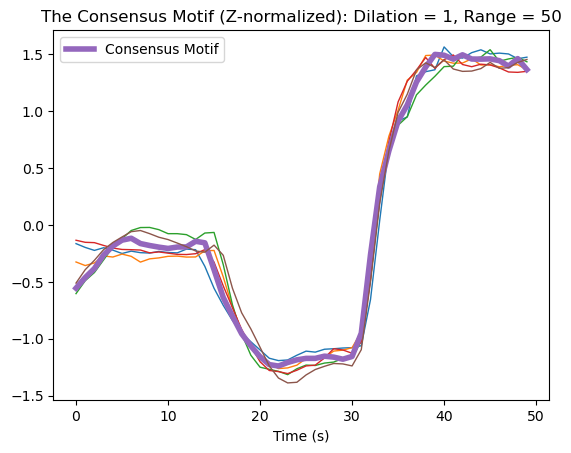

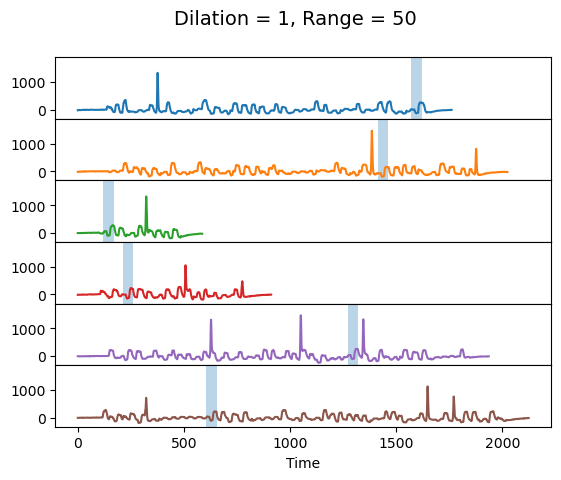

Dilation=2, w=49: Best Radius 0.35 in ts 1 starting at 1431.


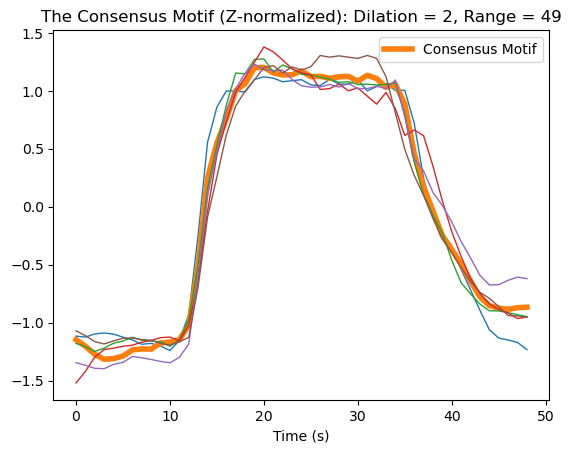

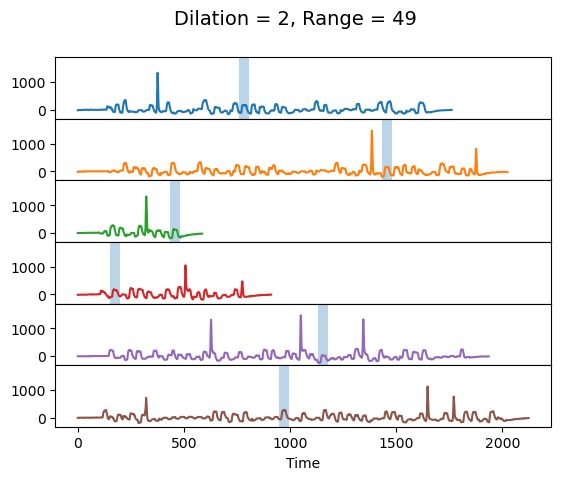

Dilation=3, w=49: Best Radius 0.27 in ts 1 starting at 1434.


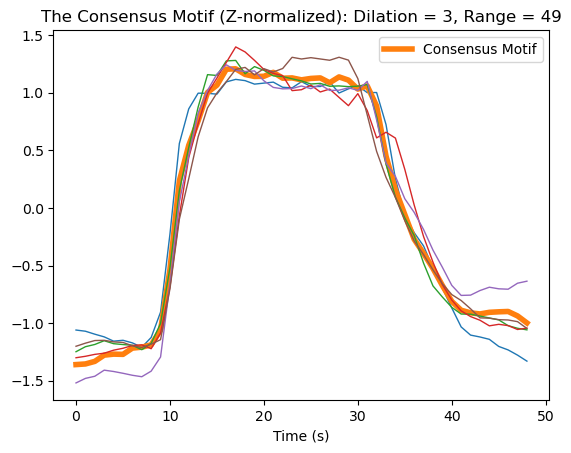

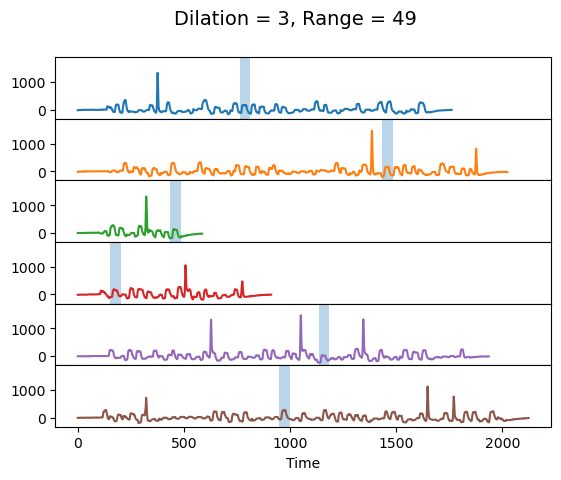

Dilation=4, w=49: Best Radius 0.25 in ts 5 starting at 1619.


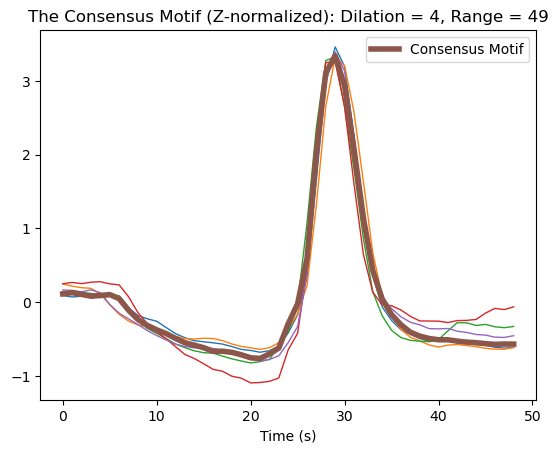

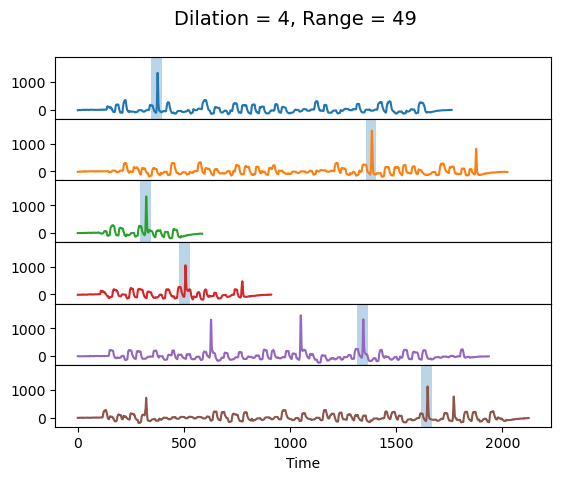

Dilation=5, w=51: Best Radius 0.23 in ts 5 starting at 1627.


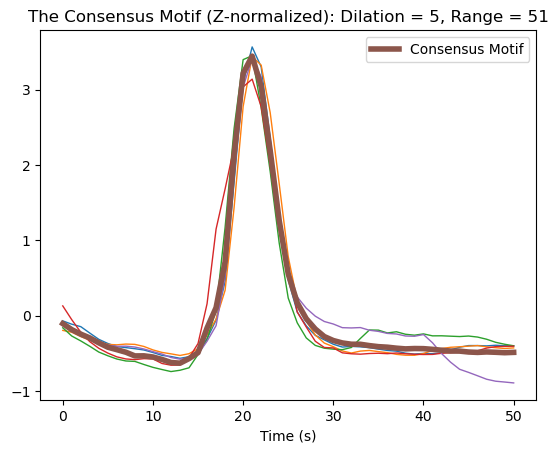

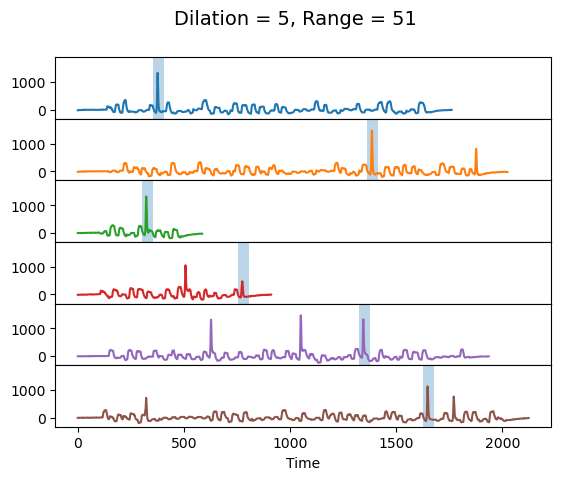

Dilation=6, w=49: Best Radius 0.18 in ts 5 starting at 703.


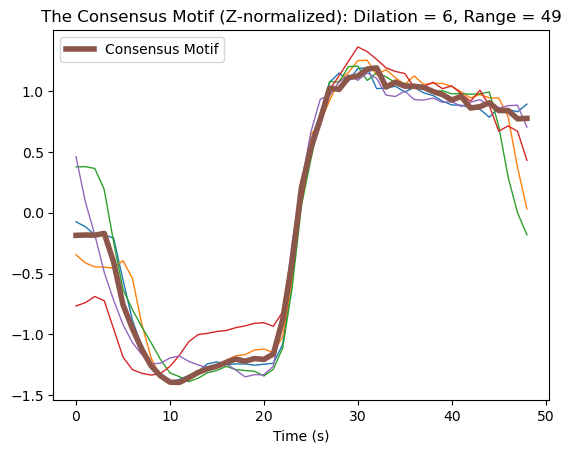

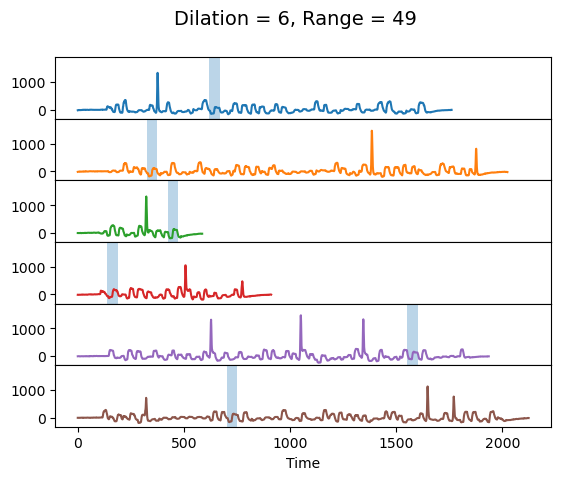

In [12]:
target_w = 50  # Chosen since the eog signal was downsampled to 50 Hz
max_dilation = utils.calculate_max_d_from_target_w(target_w)
for d in range(1, max_dilation):
    m = round((target_w-1)/d) + 1
    actual_w = (m-1)*d + 1
    radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m, d)
    print(f'Dilation={d}, w={actual_w}: Best Radius {np.round(radius, 2)} in ts {Ts_idx} starting at {subseq_idx}.') 
    # Best Radius: minimum distance between subsequence Ts_idx and its set of nearest neighbor of other time series. We refer to the time series subsequence with the smallest such radius as the time series consensus motif.
    visualize_consensusmotif(Ts, Ts_idx, subseq_idx, actual_w, d)
    